##### Instalando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random as random

##### Importando a Base de Dados


In [6]:
df = pd.read_csv("C:/Users/victo/Downloads/agricultural_raw_material.csv")



##### Analisando os Dados

In [8]:
df.info
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

##### Lidando com Dados Inconsistentes


In [13]:
# Trocando %, "," por "-"

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Descartando linhas com valores NaN

df = df.dropna()

# Checando se foi resolvido

df.isnull().sum()

# Convertendo o tipo de Dado para Float

lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes



Month                           datetime64[ns]
Coarse wool Price                      float64
Coarse wool price % Change             float64
Copra Price                            float64
Copra price % Change                   float64
Cotton Price                           float64
Cotton price % Change                  float64
Fine wool Price                        float64
Fine wool price % Change               float64
Hard log Price                         float64
Hard log price % Change                float64
Hard sawnwood Price                    float64
Hard sawnwood price % Change           float64
Hide Price                             float64
Hide price % change                    float64
Plywood Price                          float64
Plywood price % Change                 float64
Rubber Price                           float64
Rubber price % Change                  float64
Softlog Price                          float64
Softlog price % Change                 float64
Soft sawnwood

In [20]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,2.39,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51


##### Fazendo a Análise Exploratória



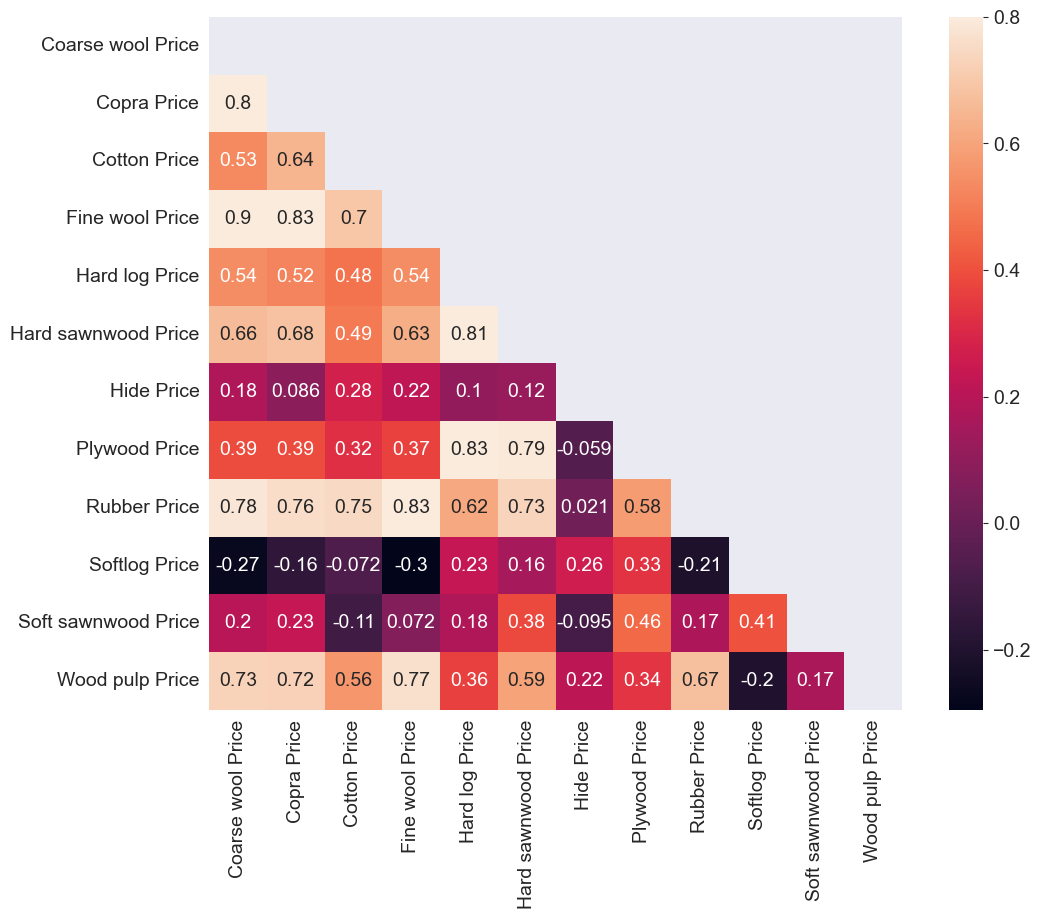

<Figure size 3000x1500 with 0 Axes>

In [26]:
# Lista de materias-primas
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

# Gerando a Matrix-Correlação

corrmat = df[raw_data].corr()

# Setando o tamanho do Plot

fig = plt.figure(figsize = (12, 9))
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Mascarando a parte superior do traingle, uma vez que a matriz é simétrica

mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']


A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas


##### Analisando a variação de Preço das Matérias Primas


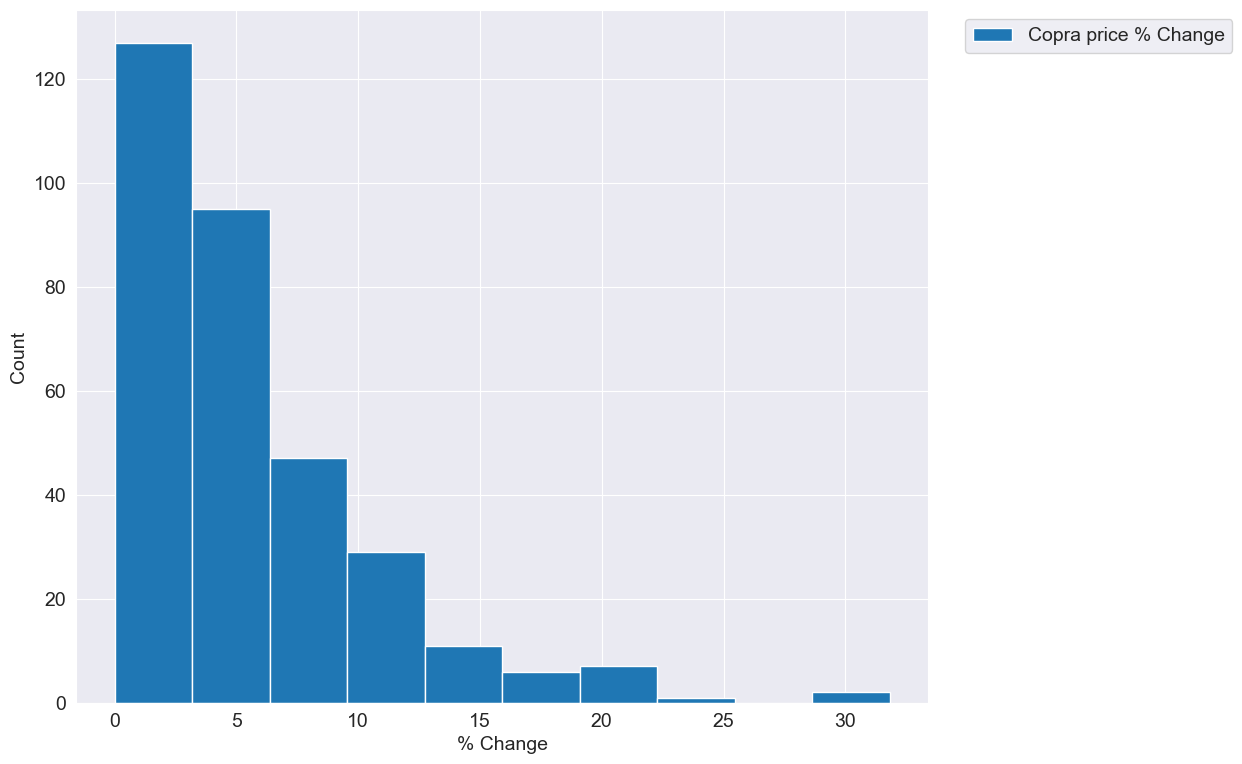

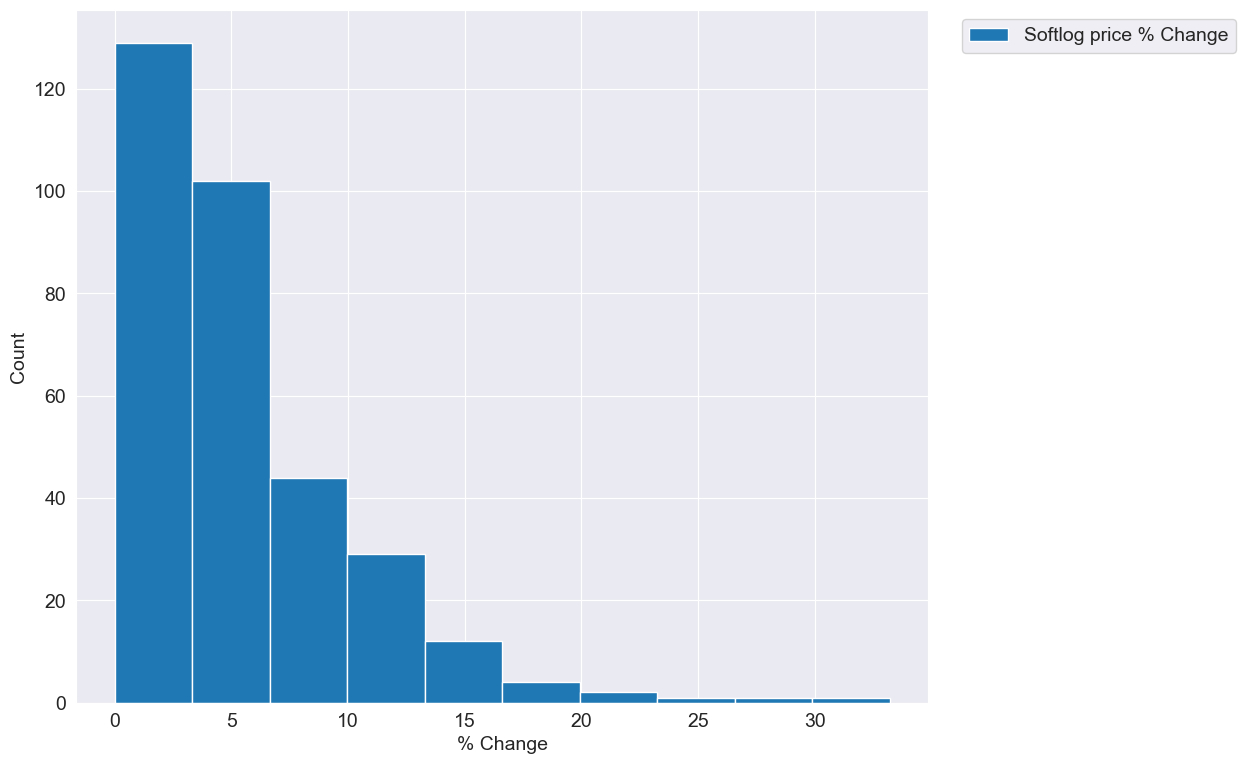

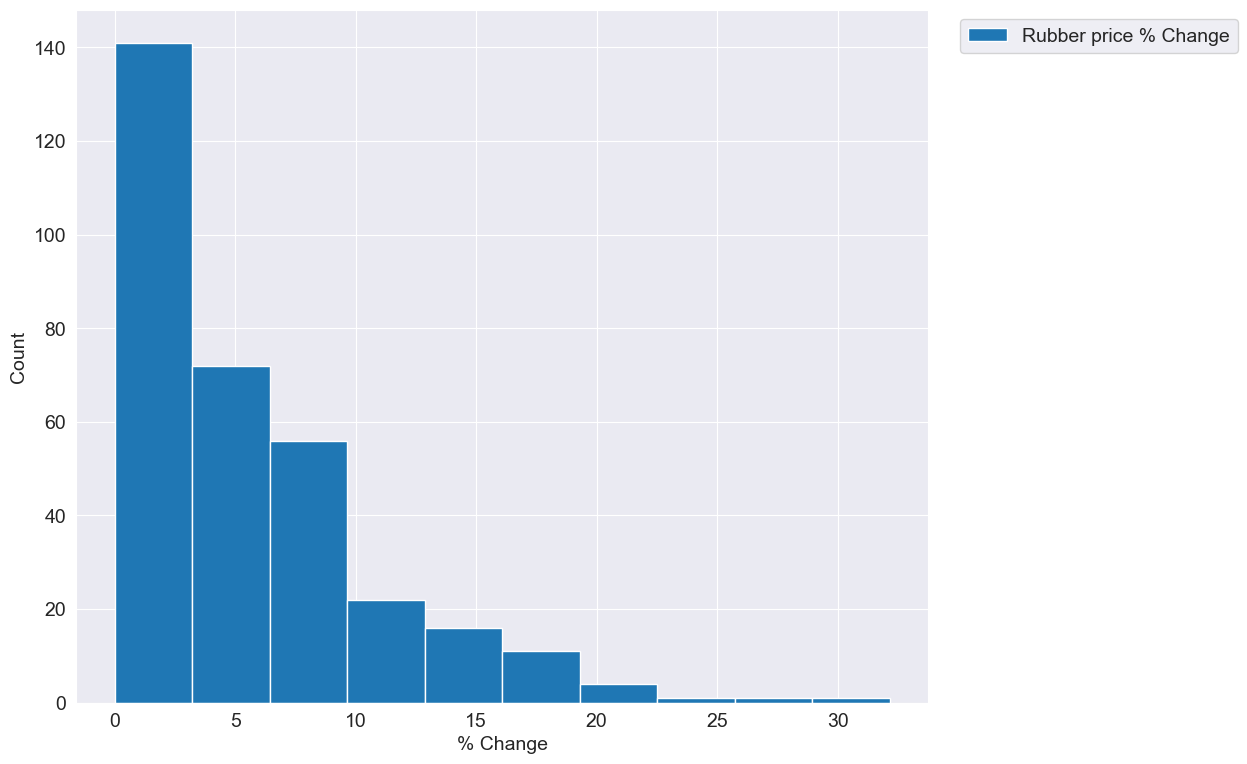

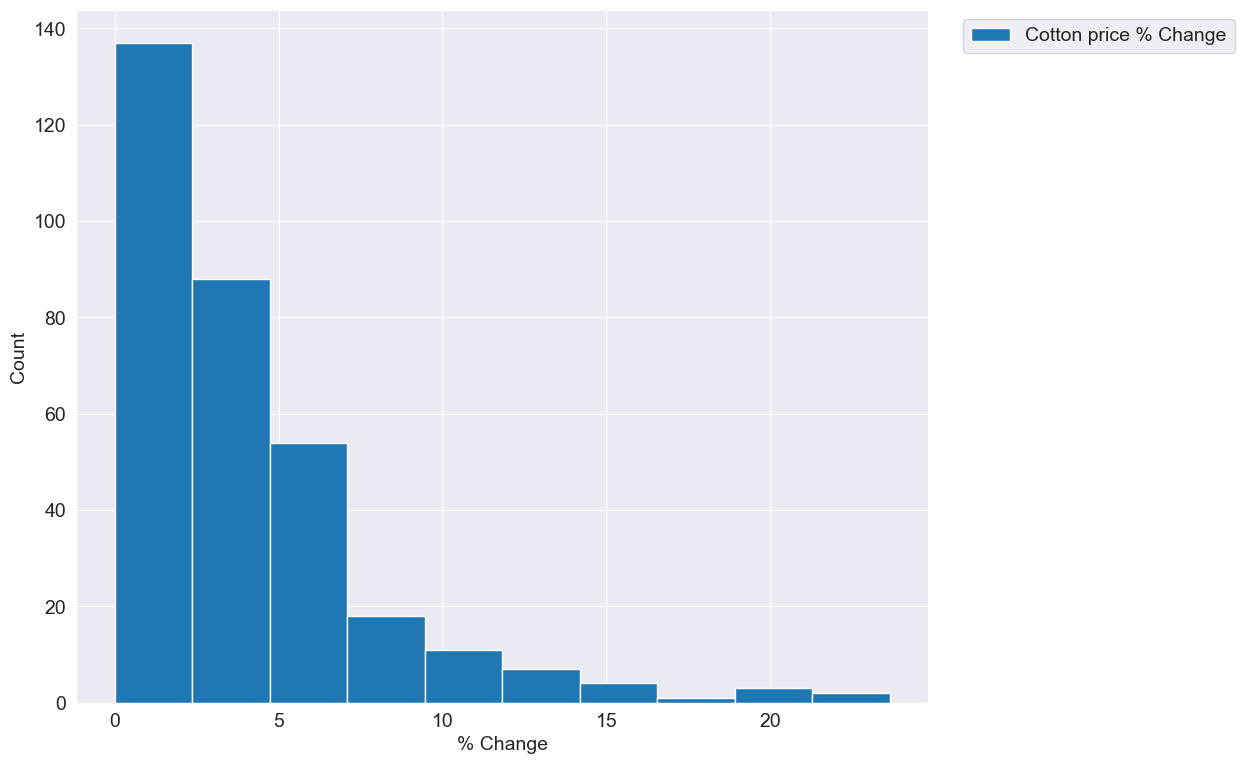

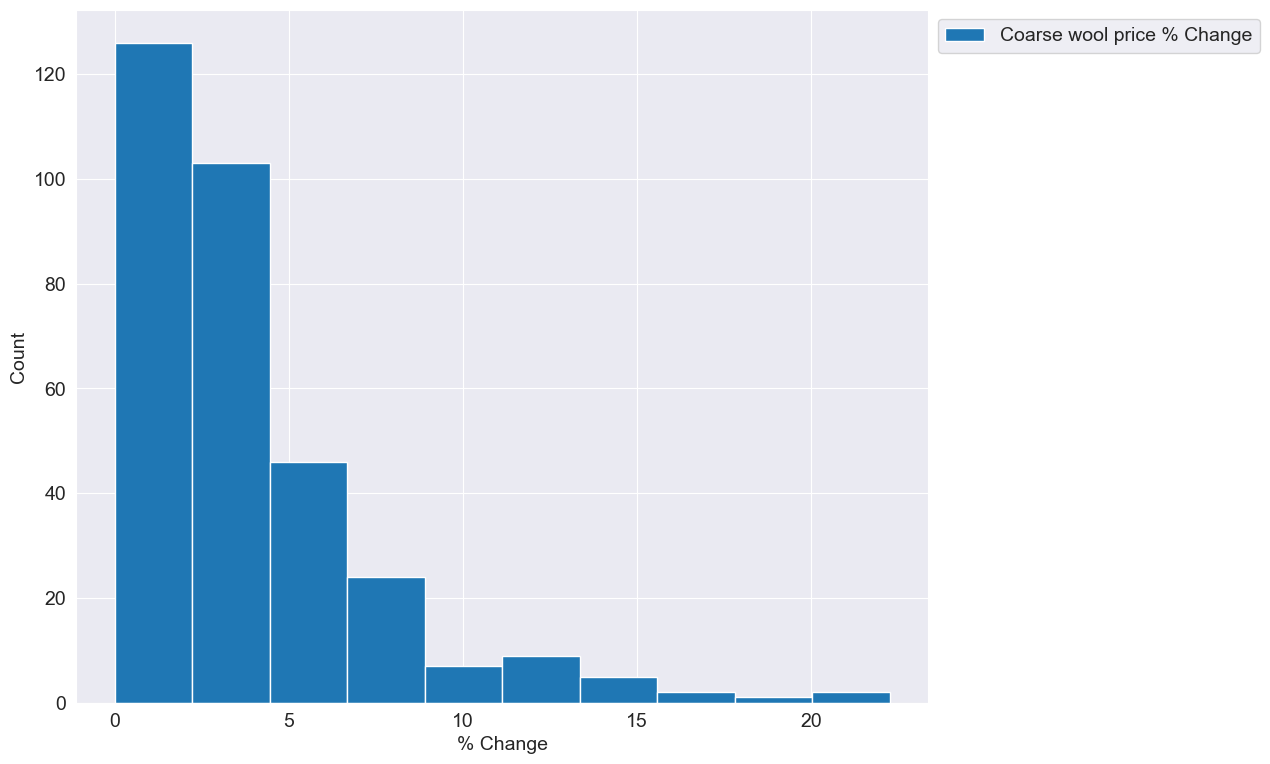

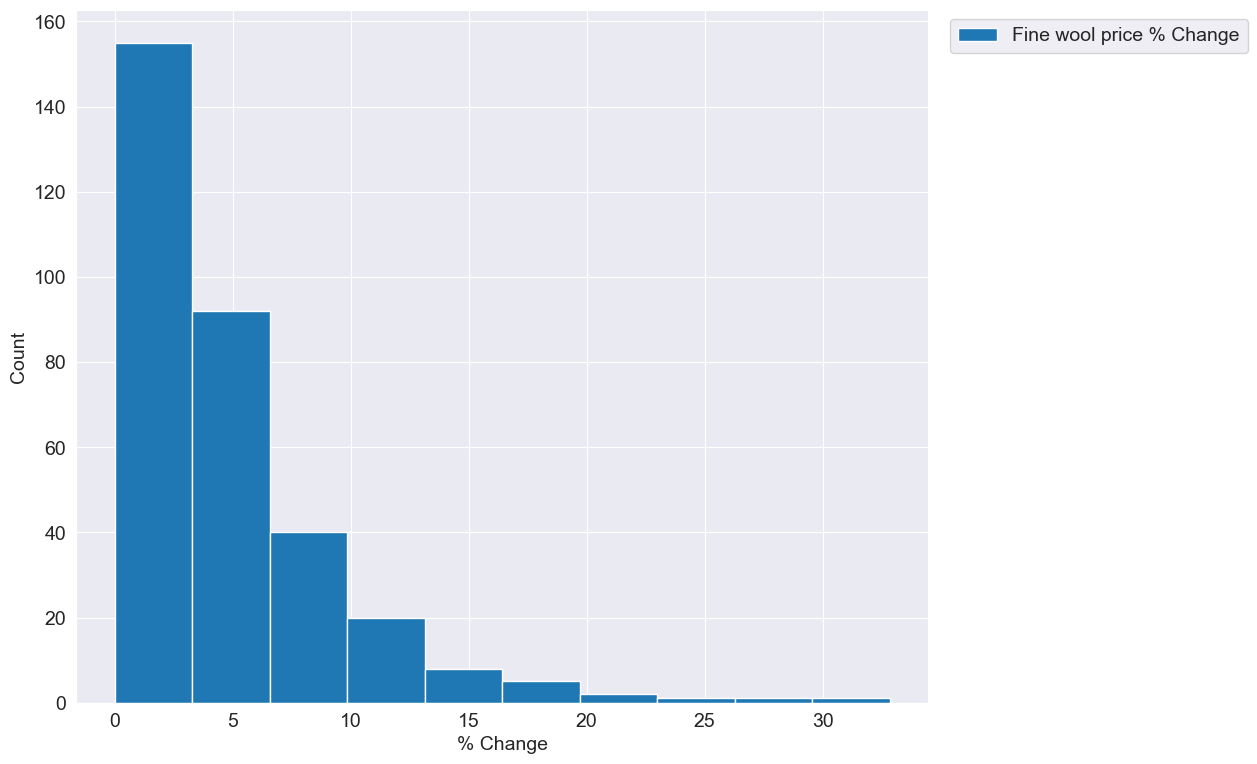

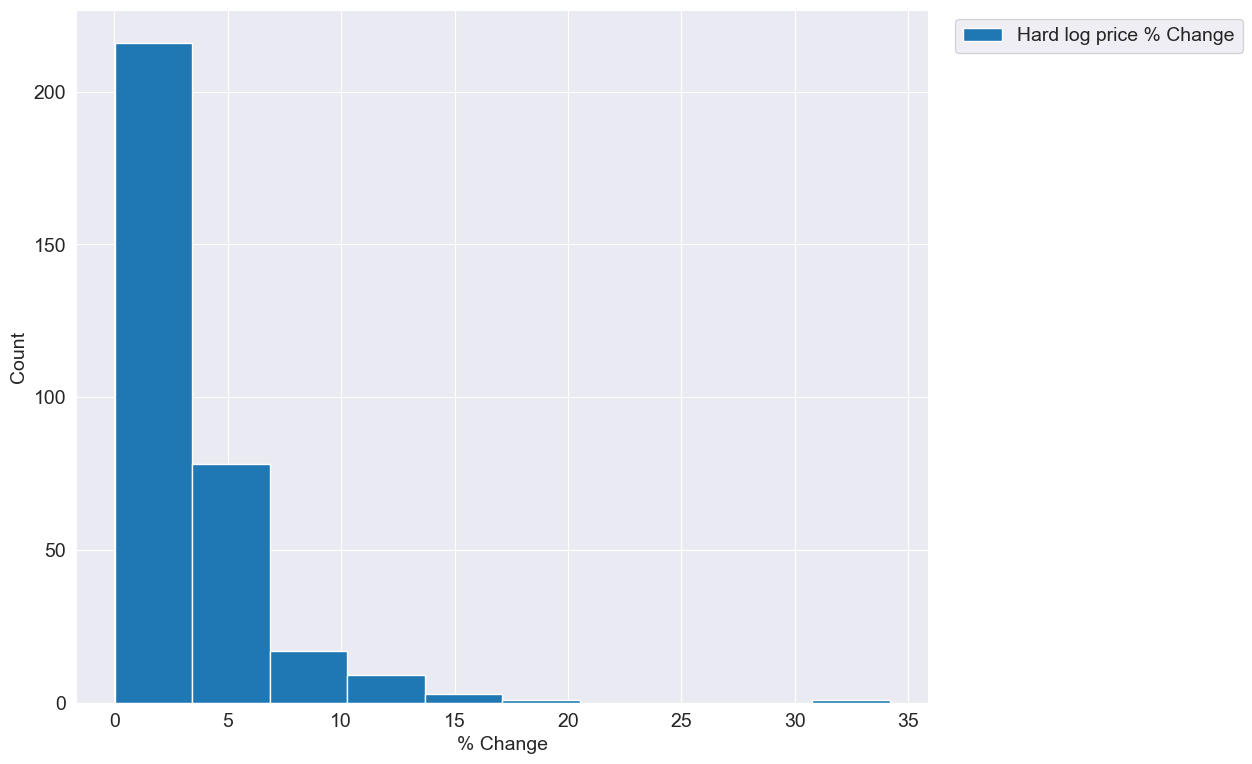

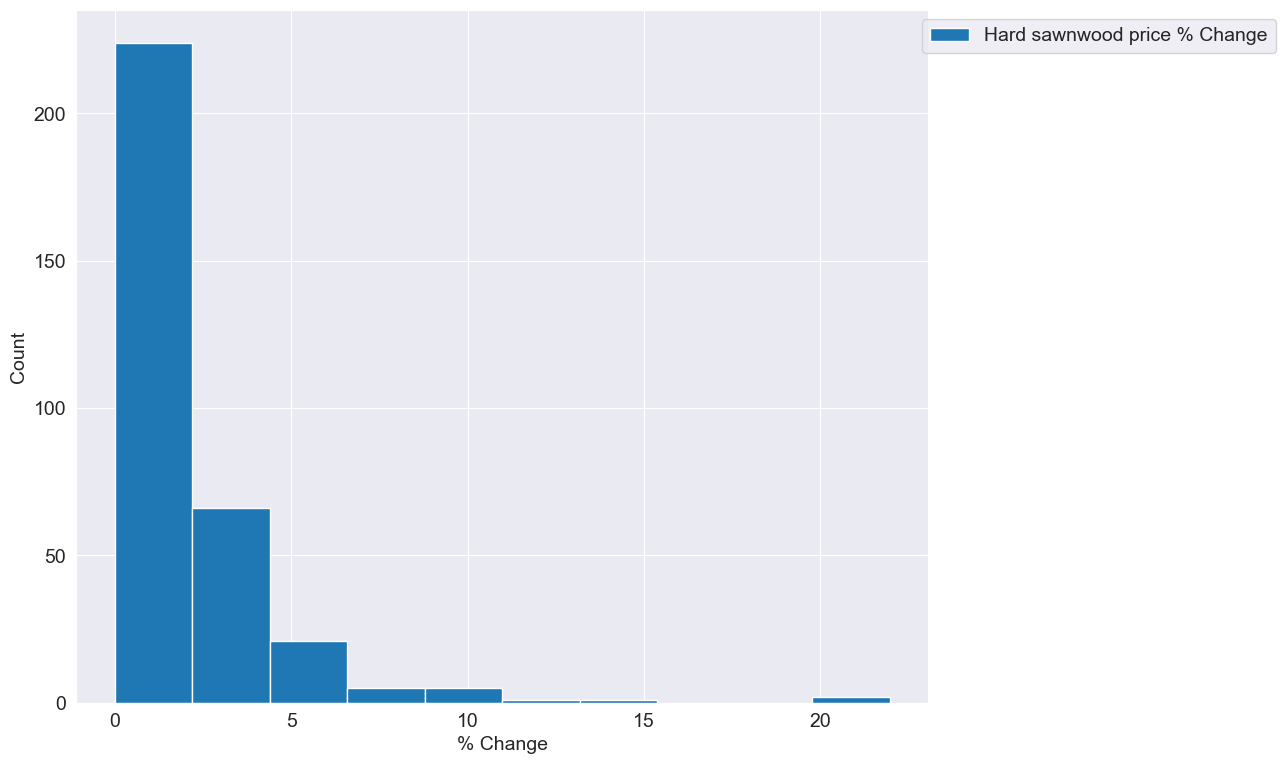

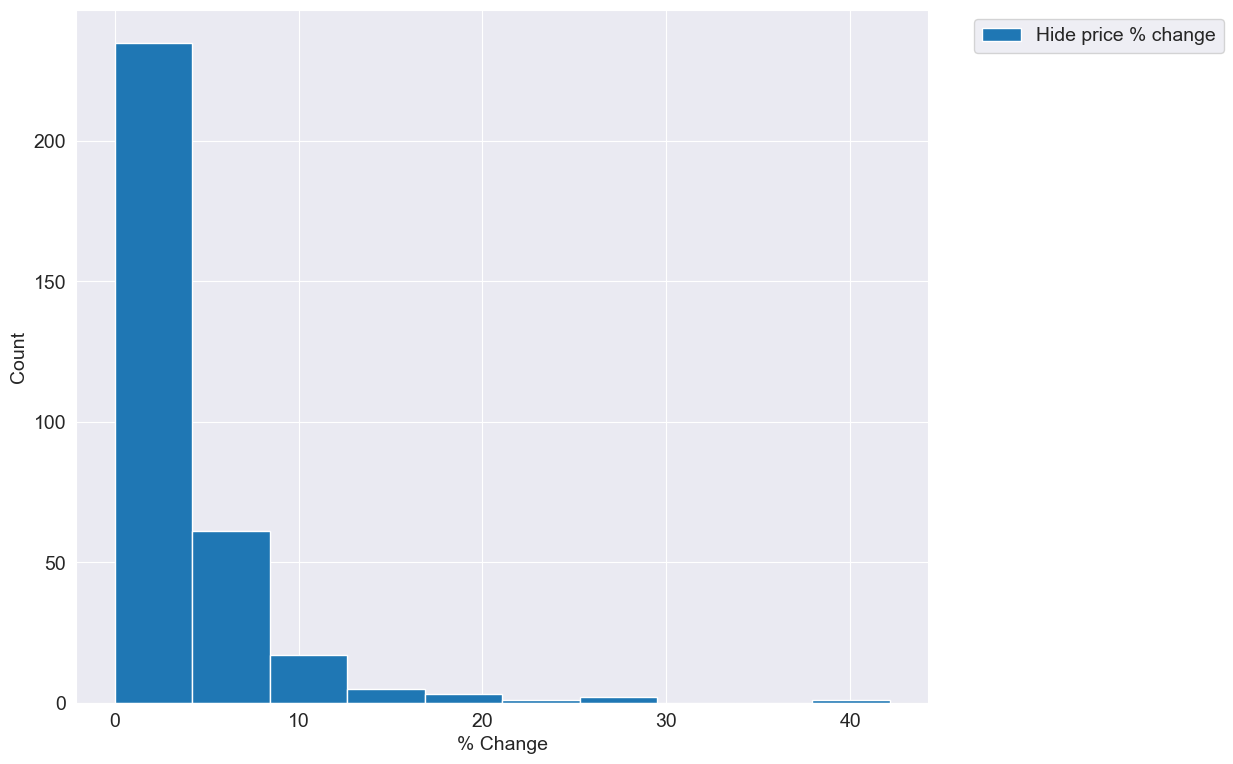

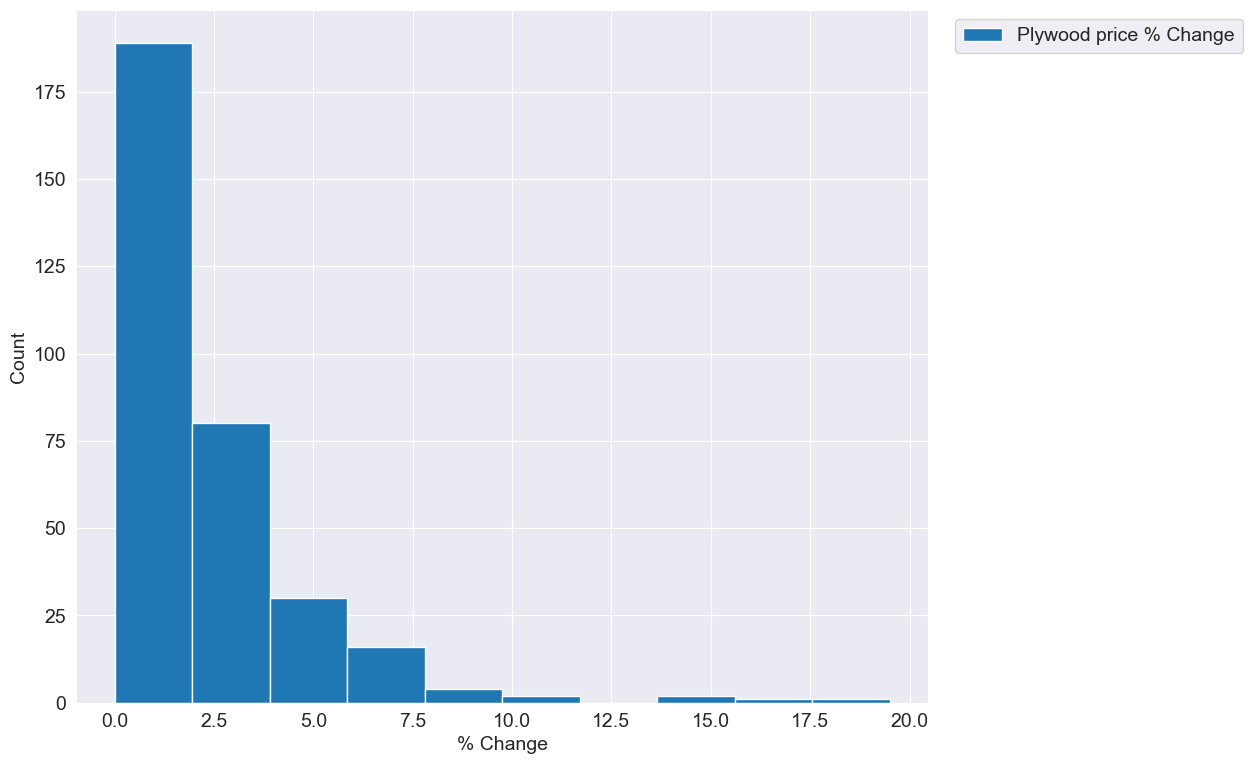

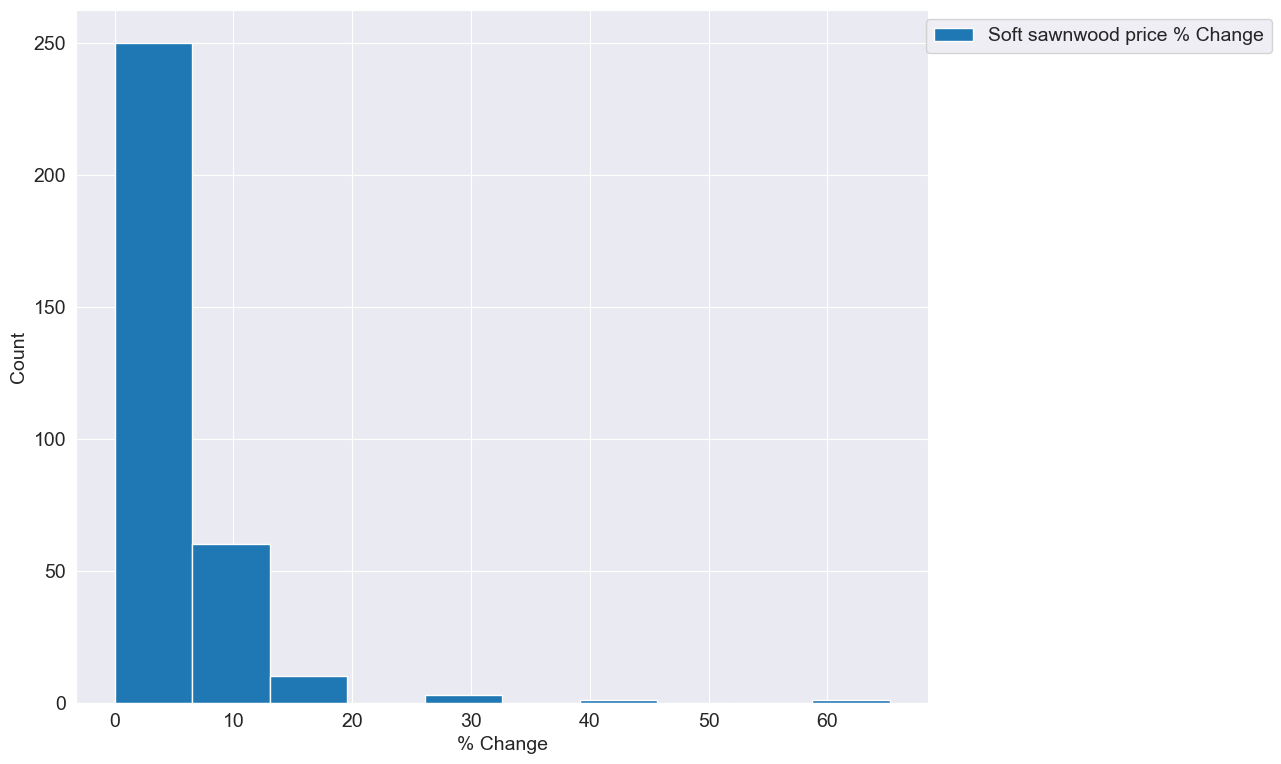

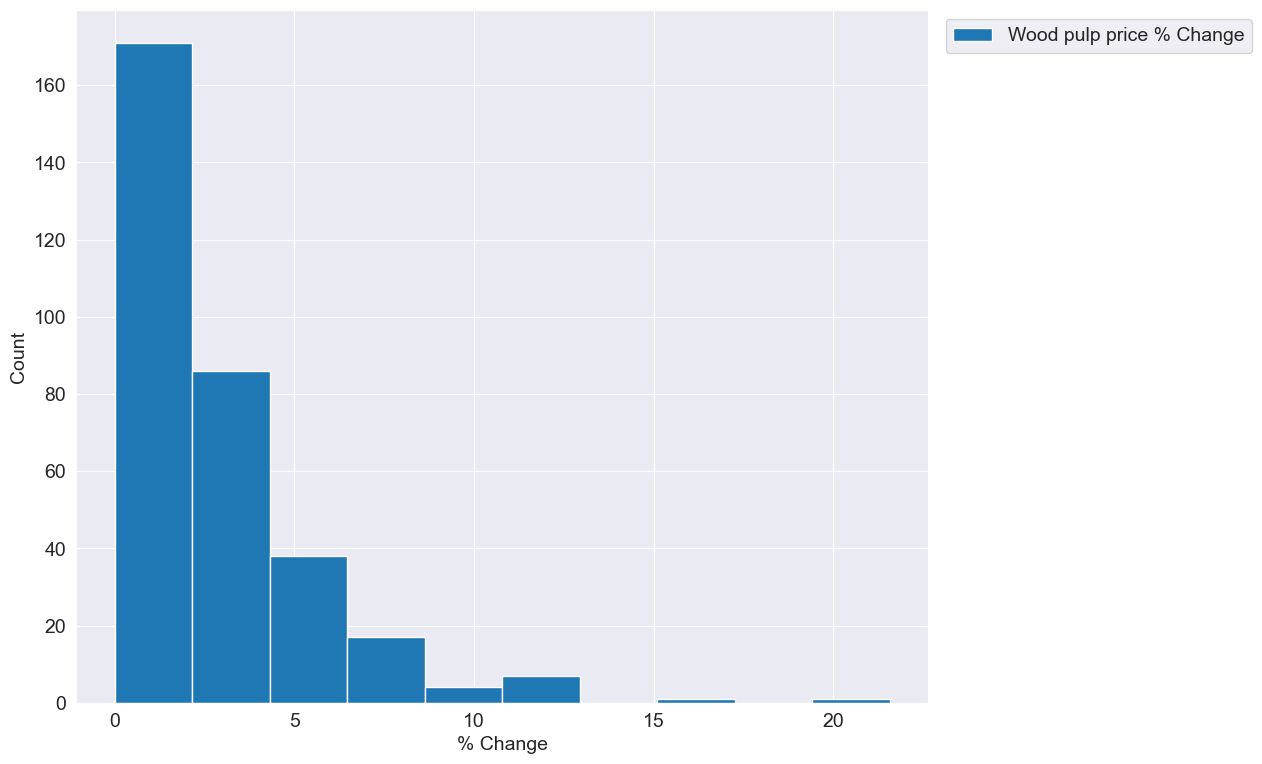

In [28]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('Count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

observamos que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

##### Iremos ver a matéria-prima que tem o menor preço ao longo dos anos

Text(0.5, 0.98, 'Comparação de Preço das matéria-prima')

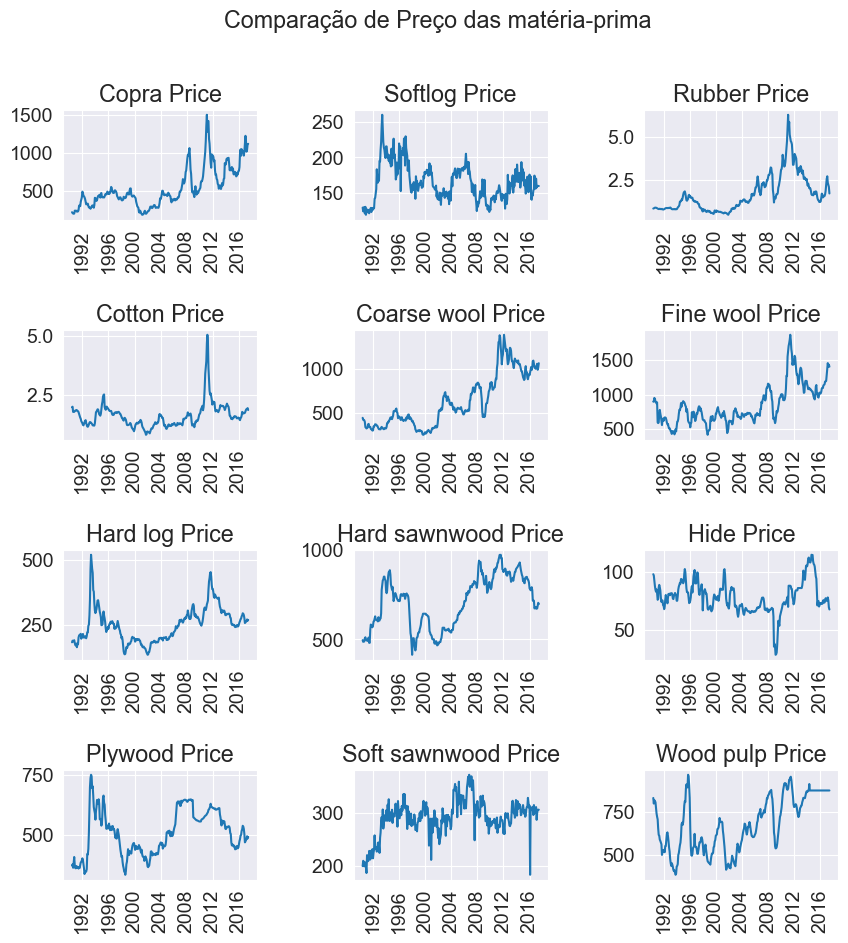

In [30]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação de Preço das matéria-prima")

Pelos Gráficos vemos que o algodão e a borracha são os que tem os menores preços ao longo dos anos


##### Qual Matéria-Prima teve a menor Variação de Preço ao longo dos anos?

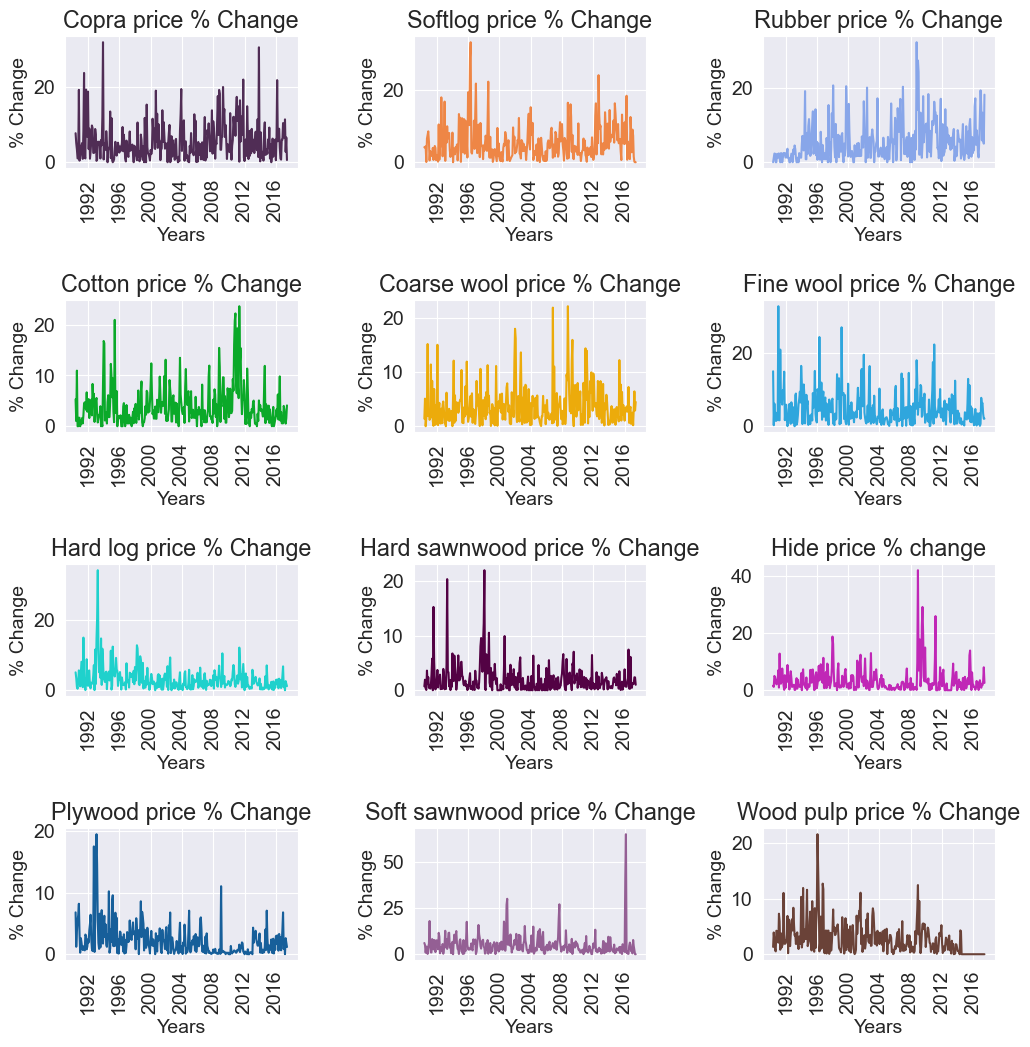

In [33]:
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
   
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

Podemos ver a maior % de variação em mais de 60 para madeira serrada macia e a menor % de variação é para madeira compensada em menos de 20

## Inferências e Conclusão
* as Matérias-prima não tem uma Correlação muito forte
* alta e baixa % de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.